## In this program, we analyze the heart and its disease.

<img src="Heart.png" alt="Heart" width="200" height="400" >


In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [113]:
data = pd.read_csv("Heart.csv" , encoding="latin-1")
data.sample(10)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
199,200,59,1,typical,160,273,0,2,125,0,0.0,1,0.0,normal,Yes
261,262,58,0,nontypical,136,319,1,2,152,0,0.0,1,2.0,normal,Yes
200,201,50,0,asymptomatic,110,254,0,2,159,0,0.0,1,0.0,normal,No
159,160,68,1,nonanginal,118,277,0,0,151,0,1.0,1,1.0,reversable,No
60,61,51,0,asymptomatic,130,305,0,0,142,1,1.2,2,0.0,reversable,Yes
106,107,59,1,asymptomatic,140,177,0,0,162,1,0.0,1,1.0,reversable,Yes
208,209,55,1,nontypical,130,262,0,0,155,0,0.0,1,0.0,normal,No
302,303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No
74,75,44,1,asymptomatic,110,197,0,2,177,0,0.0,1,1.0,normal,Yes
55,56,54,1,asymptomatic,124,266,0,2,109,1,2.2,2,1.0,reversable,Yes


In [114]:
data.head(10)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
8,9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
9,10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes


In [115]:
data.shape

(303, 15)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [117]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,303.0,152.000000,87.612784,1.0,76.5,152.0,227.5,303.0
Age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
Sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
RestBP,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
Chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
Fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
RestECG,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
MaxHR,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
ExAng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
Oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [118]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,303.0,NaN,NaN,NaN,152.0,87.612784,1.0,76.5,152.0,227.5,303.0
Age,303.0,NaN,NaN,NaN,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
Sex,303.0,NaN,NaN,NaN,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
ChestPain,303,4,asymptomatic,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestBP,303.0,NaN,NaN,NaN,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
Chol,303.0,NaN,NaN,NaN,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
Fbs,303.0,NaN,NaN,NaN,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
RestECG,303.0,NaN,NaN,NaN,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
MaxHR,303.0,NaN,NaN,NaN,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
ExAng,303.0,NaN,NaN,NaN,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0


In [119]:
data["Age"]

0      63
1      67
2      67
3      37
4      41
       ..
298    45
299    68
300    57
301    57
302    38
Name: Age, Length: 303, dtype: int64

In [120]:
data.isna().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [121]:
# for col in data.columns :
#     if (data[col]==0).any():
#         data = data[data[col] != 0]

# !!

# تحلیل اکتشافی داده ها

In [122]:
Age_ChestPain = data.groupby("Age")["ChestPain"].sum().reset_index().sort_values(by='Age',ascending=False)
Age_ChestPain

,Age,ChestPain
40,77,asymptomatic
39,76,nonanginal
38,74,nontypical
37,71,nontypicalnonanginalasymptomatic
36,70,asymptomaticasymptomaticnonanginalnontypical
35,69,typicalnonanginaltypical
34,68,nonanginalnonanginalnonanginalasymptomatic
33,67,asymptomaticasymptomaticasymptomaticnonanginal...
32,66,typicalasymptomaticnontypicalasymptomaticasymp...
31,65,asymptomaticnonanginalasymptomaticnonanginalas...


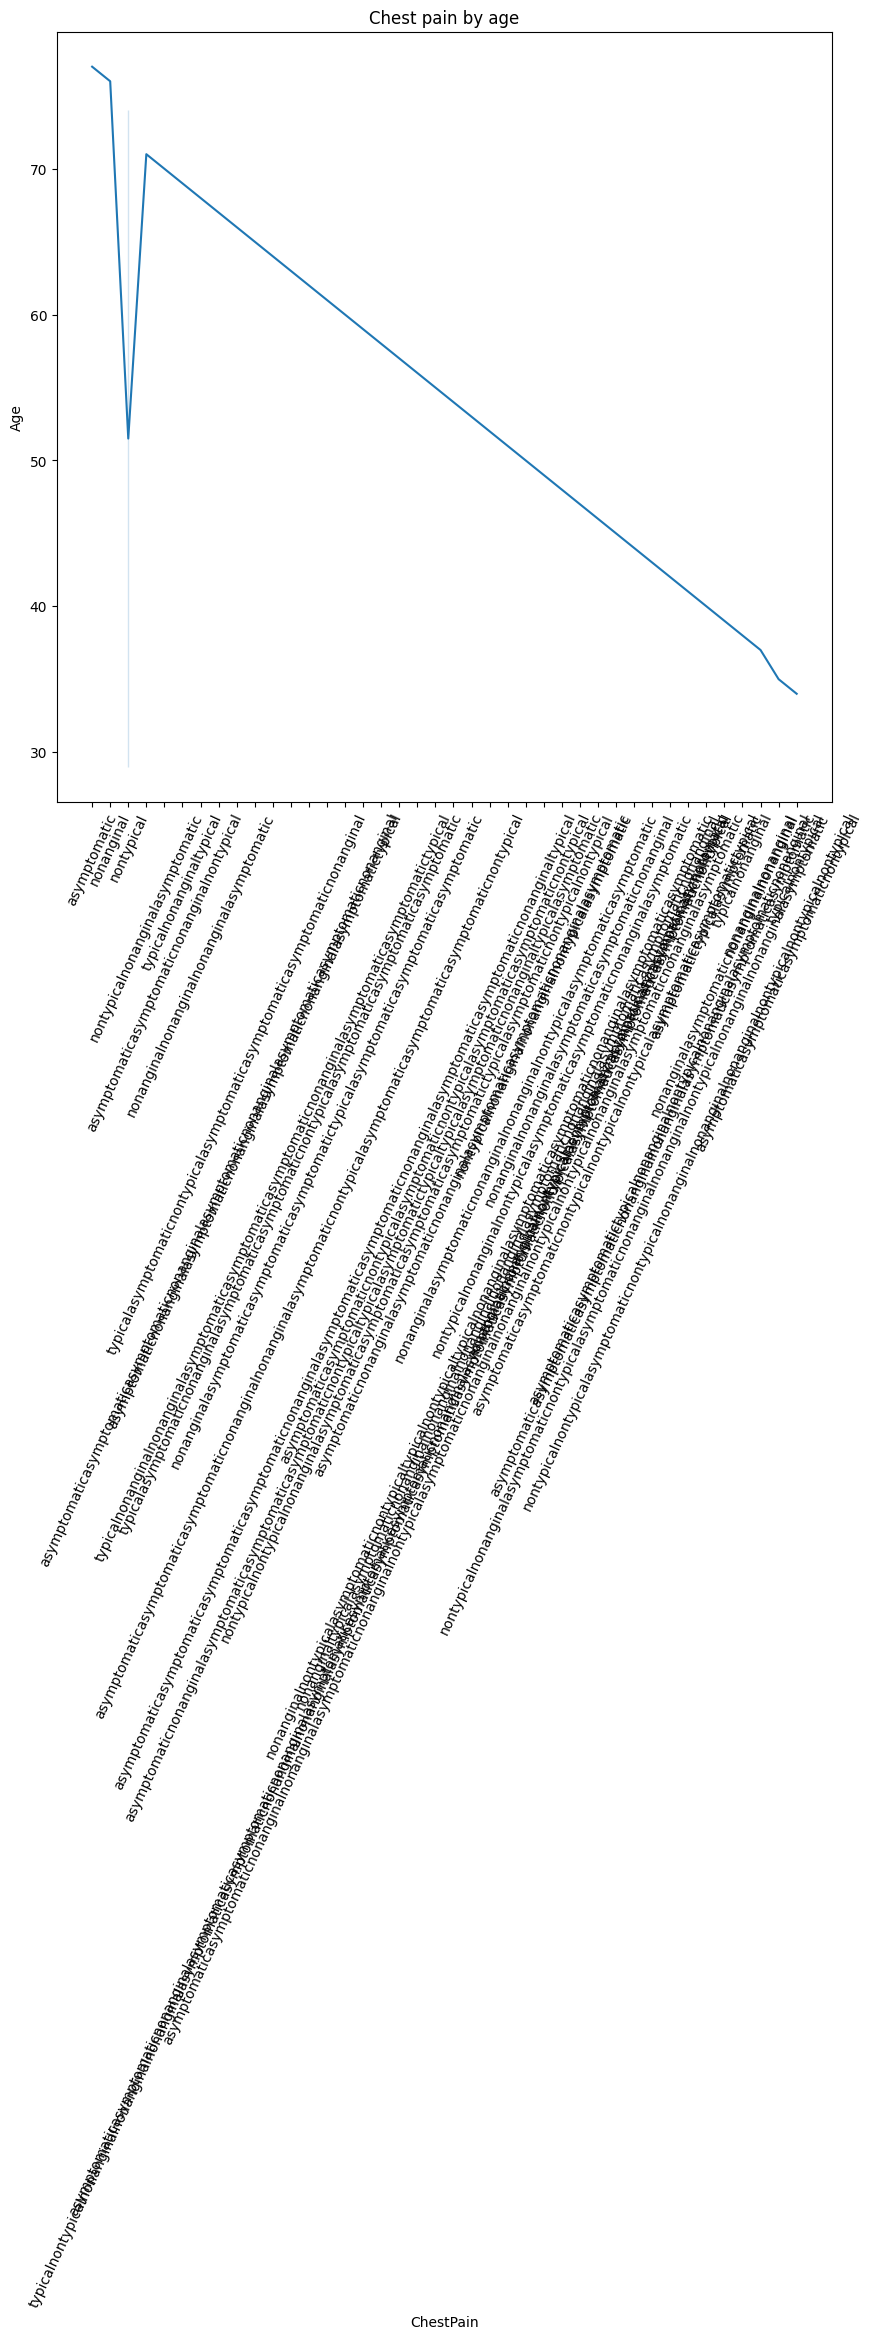

In [123]:
fig = plt.figure(figsize=(10,10))
plt.title("Chest pain by age")
sns.lineplot(data=Age_ChestPain , x = "ChestPain" , y = "Age")
plt.xticks(rotation=65)
plt.show()

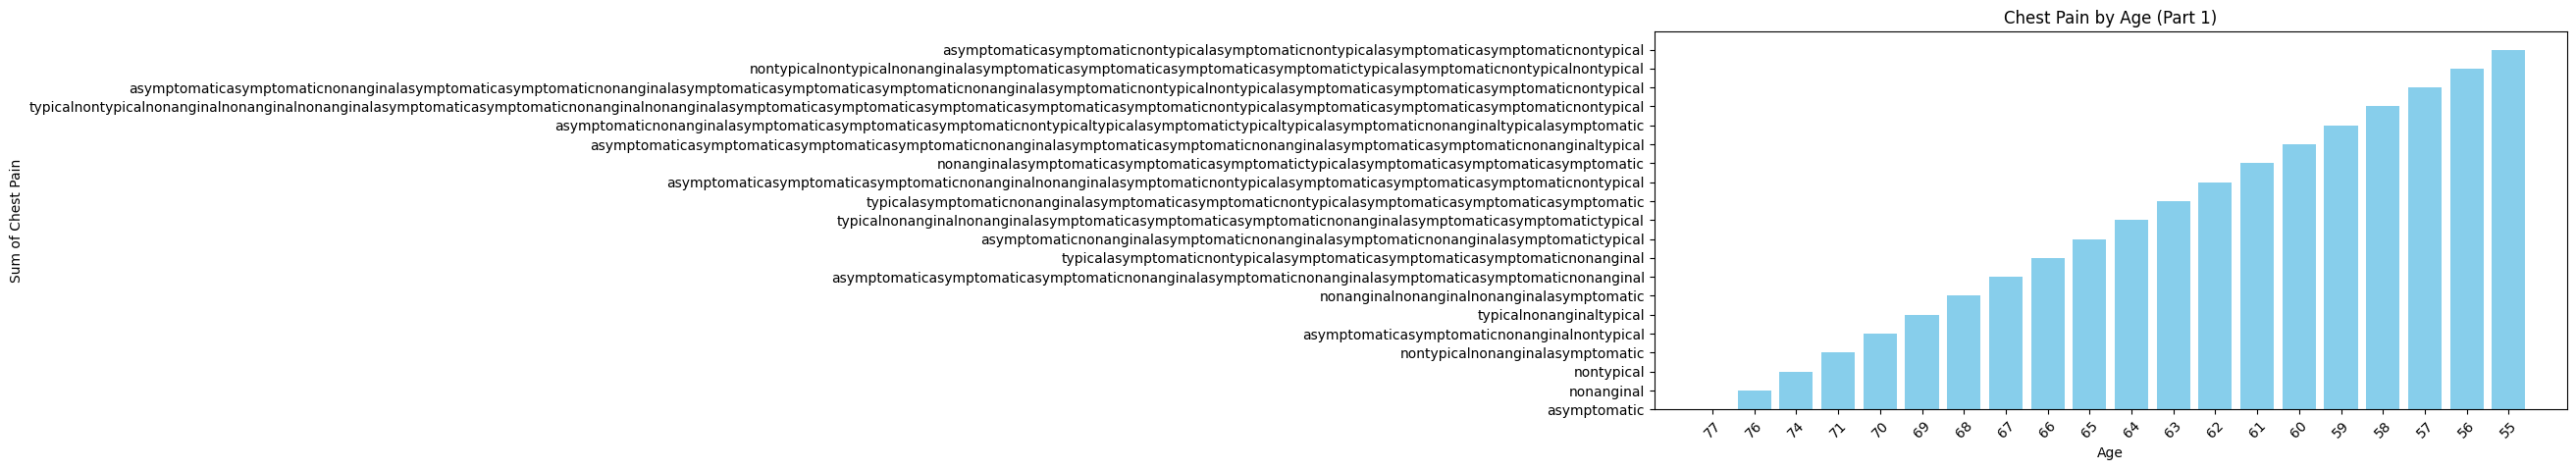

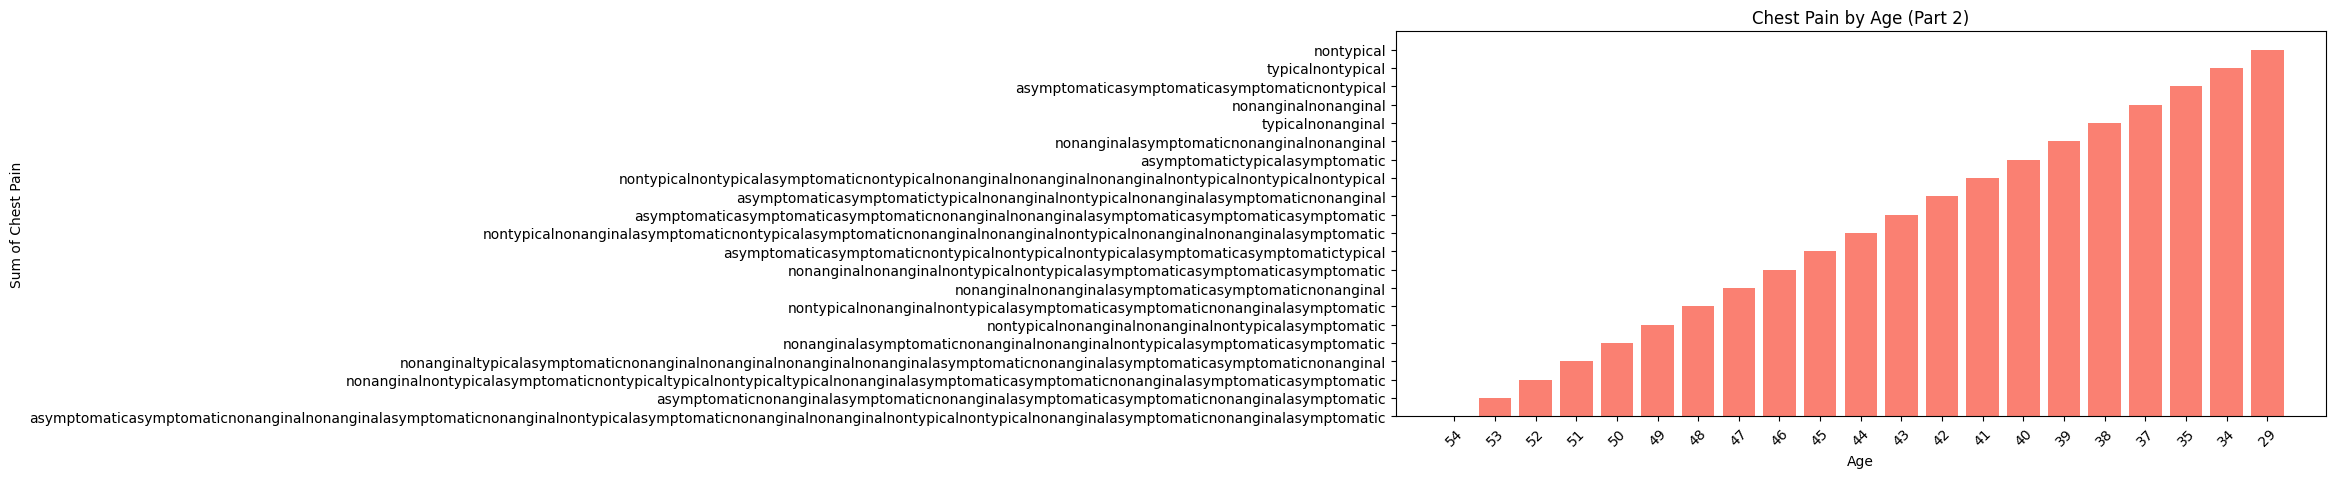

In [124]:
# Assuming Age_ChestPain is already defined as:
# Age_ChestPain = data.groupby("Age")["ChestPain"].sum().reset_index().sort_values(by='Age', ascending=False)

# Split into two parts
mid_point = len(Age_ChestPain) // 2
part1 = Age_ChestPain.iloc[:mid_point]
part2 = Age_ChestPain.iloc[mid_point:]

# Plot first part
plt.figure(figsize=(12, 5))
plt.bar(part1['Age'].astype(str), part1['ChestPain'], color='skyblue')
plt.title('Chest Pain by Age (Part 1)')
plt.xlabel('Age')
plt.ylabel('Sum of Chest Pain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot second part
plt.figure(figsize=(12, 5))
plt.bar(part2['Age'].astype(str), part2['ChestPain'], color='salmon')
plt.title('Chest Pain by Age (Part 2)')
plt.xlabel('Age')
plt.ylabel('Sum of Chest Pain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [125]:
RestBP_ChestPain = data.groupby('RestBP')['ChestPain'].sum()
# Sex_ChestPain = data.groupby("ChestPain")["RestBP"].sum().reset_index().sort_values(by='ChestPain',ascending=False)
RestBP_ChestPain

RestBP
94                                  nonanginalnonanginal
100       nonanginalasymptomaticasymptomaticasymptomatic
101                                           nontypical
102                               nonanginalasymptomatic
104                                         asymptomatic
105                       nontypicalnonanginalnontypical
106                                         asymptomatic
108    nonanginalnontypicalnonanginalasymptomaticnona...
110    nontypicaltypicalasymptomaticnonanginalasympto...
112    nonanginalasymptomaticnonanginalnontypicalasym...
114                                         asymptomatic
115                   asymptomaticnonanginalasymptomatic
117                                         asymptomatic
118    typicalasymptomatictypicalnonanginalnontypical...
120    asymptomaticnontypicalasymptomaticnontypicalno...
122         asymptomaticnonanginalasymptomaticnontypical
123                                         asymptomatic
124    asymptomaticasymp

In [126]:
print(RestBP_ChestPain)
print("-------------------------------")
print(RestBP_ChestPain.dtype)

RestBP
94                                  nonanginalnonanginal
100       nonanginalasymptomaticasymptomaticasymptomatic
101                                           nontypical
102                               nonanginalasymptomatic
104                                         asymptomatic
105                       nontypicalnonanginalnontypical
106                                         asymptomatic
108    nonanginalnontypicalnonanginalasymptomaticnona...
110    nontypicaltypicalasymptomaticnonanginalasympto...
112    nonanginalasymptomaticnonanginalnontypicalasym...
114                                         asymptomatic
115                   asymptomaticnonanginalasymptomatic
117                                         asymptomatic
118    typicalasymptomatictypicalnonanginalnontypical...
120    asymptomaticnontypicalasymptomaticnontypicalno...
122         asymptomaticnonanginalasymptomaticnontypical
123                                         asymptomatic
124    asymptomaticasymp

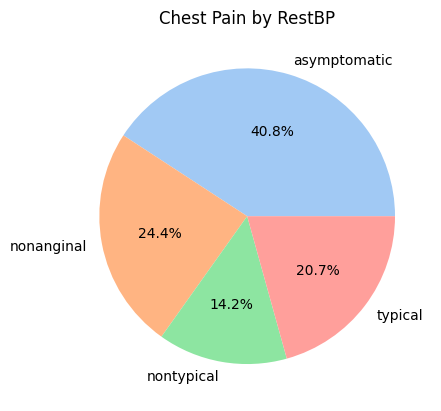

In [127]:
# فرض بر این است که RestBP_ChestPain یک Series از رشته‌هاست
all_text = ''.join(RestBP_ChestPain.dropna().astype(str))
categories = ['asymptomatic', 'nonanginal', 'nontypical', 'typical']
counts = {cat: all_text.count(cat) for cat in categories}

plt.title("Chest Pain by RestBP")
colors = sns.color_palette('pastel')[0:len(counts)]
plt.pie(list(counts.values()), labels=list(counts.keys()), autopct="%1.1f%%", colors=colors)
plt.show()



In [128]:
# plt.title("Chest Pain by RestBP ")
# color = sns.color_palette('pastel')[0:len(RestBP_ChestPain)]
# # plt.pie(RestBP_ChestPain.values , labels=RestBP_ChestPain.index,autopct="%1.1f%%",colors=color)
# plt.show()